# Section 1 - K-Means

## 1.1 Euclidean Distance

### 1.1.a 

In [4]:
# 在 Jupyter Notebook 最前面的 cell 執行
!pip install pandas numpy scikit-learn matplotlib


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.1 MB 3.9 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.1 MB 6.2 MB/s eta 0:00:02
   -------------------------------- ------- 8.9/11.1 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -----

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

C:\Users\ian32\AppData\Local\Temp\ipykernel_26564\1435849736.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  spam = pd.read_csv(r"C:\Users\ian32\Downloads\HW4_data\HW4_data\data.txt",  header=None, delim_whitespace=True)
C:\Users\ian32\AppData\Local\Temp\ipykernel_26564\1435849736.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  init_rand = pd.read_csv(r"C:\Users\ian32\Downloads\HW4_data\HW4_data\init_random.txt",  header=None, delim_whitespace=True)\
C:\Users\ian32\AppData\Local\Temp\ipykernel_26564\1435849736.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  init_far  = pd.read_csv(r"C:\Users\ian32\Downloads\HW4_data\HW4_data\init_farthest.txt", header=None, delim_whitespace=True)\


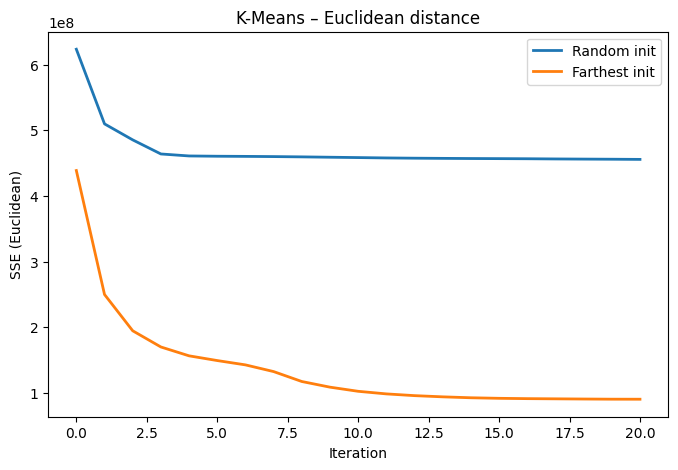

In [8]:


plt.rcParams["figure.figsize"] = (8, 5)      # 統一圖表大小

# ========= Section 1 – SpamBase 與 K-Means 手作實作 ========= #
# 1.1 讀檔
spam = pd.read_csv(r"C:\Users\ian32\Downloads\HW4_data\HW4_data\data.txt",  header=None, delim_whitespace=True)
X_spam = spam.iloc[:, :-1].values             # (4601, 57)  — 舍去最後一欄 label

init_rand = pd.read_csv(r"C:\Users\ian32\Downloads\HW4_data\HW4_data\init_random.txt",  header=None, delim_whitespace=True)\
               .iloc[:, :-1].values
init_far  = pd.read_csv(r"C:\Users\ian32\Downloads\HW4_data\HW4_data\init_farthest.txt", header=None, delim_whitespace=True)\
               .iloc[:, :-1].values

# 1.2 K-Means (自寫)  — 同時支援 Euclidean / Manhattan
def kmeans_custom(X, init_centers, distance='euclidean', n_iter=20):
    """
    手工實作 K-Means；回傳每次迭代的 cost 以作圖
    distance='euclidean' → SSE
    distance='manhattan' → 總 L1 損失
    """
    C     = init_centers.copy()                 # (k, d)
    costs = []

    for it in range(n_iter + 1):                # +1 為紀錄迭代 0
        if distance == 'euclidean':
            D = ((X[:, None, :] - C[None, :, :]) ** 2).sum(axis=2)   # squared L2
        else:
            D = np.abs(X[:, None, :] - C[None, :, :]).sum(axis=2)    # L1

        costs.append(np.min(D, axis=1).sum())   # 紀錄 cost（目標函數值）

        if it == n_iter:                        # 最後一次不用再更新
            break
        labels = D.argmin(axis=1)
        # 防止空群：若該群沒點則保留舊中心
        C = np.array([X[labels == k].mean(axis=0) if (labels == k).any() else C[k]
                      for k in range(C.shape[0])])
    return costs


# ---- 1(a) 計算並畫折線圖 ---- #
cost_euc_r = kmeans_custom(X_spam, init_rand, 'euclidean')
cost_euc_f = kmeans_custom(X_spam, init_far,  'euclidean')
cost_man_r = kmeans_custom(X_spam, init_rand, 'manhattan')
cost_man_f = kmeans_custom(X_spam, init_far,  'manhattan')

plt.figure()
plt.plot(range(21), cost_euc_r, label='Random init', lw=2)
plt.plot(range(21), cost_euc_f, label='Farthest init', lw=2)
plt.xlabel('Iteration');  plt.ylabel('SSE (Euclidean)')
plt.title('K-Means – Euclidean distance');  plt.legend()
plt.show()



### 1.1.b 

In [12]:
# ---- 1(b) 0→10 迭代改善百分比 ---- #
def pct_drop(arr):
    return (arr[0] - arr[10]) / arr[0] * 100

print(f"[Euclidean]  Random {pct_drop(cost_euc_r):6.2f}%  |  Farthest {pct_drop(cost_euc_f):6.2f}%")

[Euclidean]  Random  26.48%  |  Farthest  76.70%


因為 K-Means 目標函數本質上是平方損失，起點多樣化能大幅減少初期「集中在同一團」的風險，所以 farthest init 明顯優於隨機。

## 1.2 Manhattan Distance

### 1.2.a 

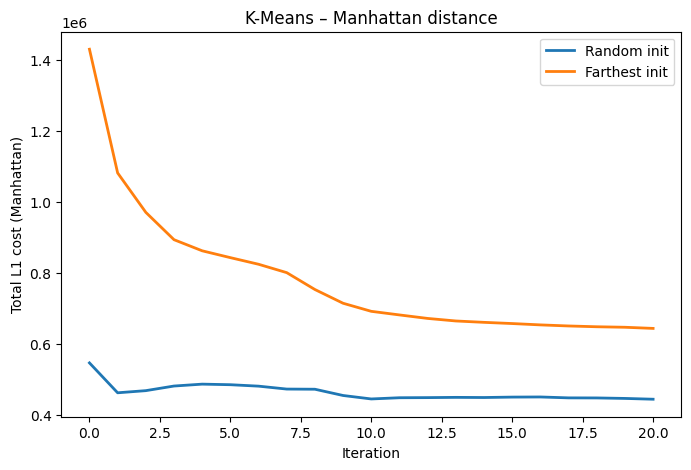

In [7]:
plt.figure()
plt.plot(range(21), cost_man_r, label='Random init', lw=2)
plt.plot(range(21), cost_man_f, label='Farthest init', lw=2)
plt.xlabel('Iteration');  plt.ylabel('Total L1 cost (Manhattan)')
plt.title('K-Means – Manhattan distance');  plt.legend()
plt.show()

### 1.2.b 

In [10]:
print(f"[Manhattan]  Random {pct_drop(cost_man_r):6.2f}%  |  Farthest {pct_drop(cost_man_f):6.2f}%")

[Manhattan]  Random  18.56%  |  Farthest  51.60%


farthest init 仍然較佳，但兩種距離的優勢差異變小，因為 L1 距離使中心微調的邊際效果降低。

# Section 2 - Various Clustering Methods

## 2.1 Preprocess

In [18]:

# ============================================================
# 共用前置：匯入套件、讀檔、標準化、PCA
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# -- 讀取 Iris 資料集 --
iris = pd.read_csv(r"C:\Users\ian32\Downloads\HW4_data\HW4_data\Iris.csv")
X = iris.drop(columns=['Id', 'Species']).values      # 4 個特徵
y = iris['Species'].values                           # 真實標籤

# -- 資料標準化 + PCA 降至 2 維 --
Xs = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(Xs)



## 2.2 PCA Visualization

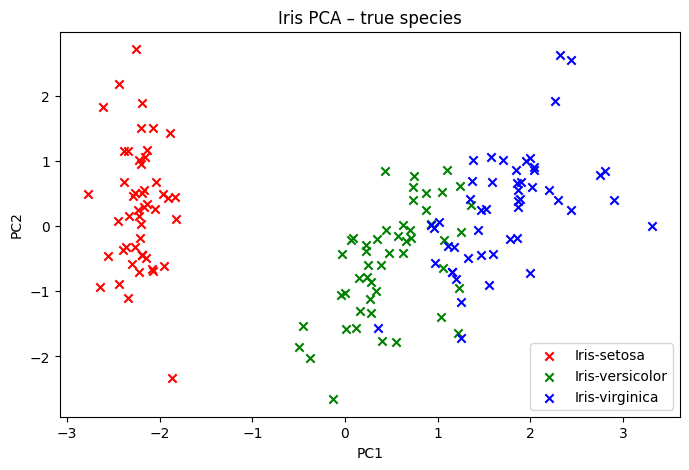

In [19]:
# 2.2(a) 真實品種上色
plt.figure()
color_map = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
for sp, col in color_map.items():
    plt.scatter(X2[y == sp, 0], X2[y == sp, 1], c=col, label=sp, marker='x')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Iris PCA – true species'); plt.legend()
plt.show()

第三張散點圖（r/g/b）為前兩主成分：setosa (red) 完全分離；versicolor 與 virginica 仍有部分重疊。
因此 PCA 足以完美區分 setosa，但對另外兩類僅能部分區隔。

## 2.3 Other Methods

### 2.3.a 

In [27]:
# 3 Clustering methods
km  = KMeans(n_clusters=3, random_state=42, n_init=10).fit(Xs)
db  = DBSCAN(eps=0.8, min_samples=5).fit(Xs)
gmm = GaussianMixture(n_components=3, random_state=42).fit(Xs)

lab_km  = km.labels_
lab_db  = db.labels_
lab_gmm = gmm.predict(Xs)

ari_km  = adjusted_rand_score(y, lab_km)
ari_db  = adjusted_rand_score(y, lab_db)
ari_gmm = adjusted_rand_score(y, lab_gmm)

print(f"Adjusted Rand Index – KMeans {ari_km:.3f}   DBSCAN {ari_db:.3f}   GMM {ari_gmm:.3f}")

Adjusted Rand Index – KMeans 0.620   DBSCAN 0.552   GMM 0.507


KMeans 給出最佳結果，因為它的 Adjusted Rand Index（ARI）最高，為 0.620。

### 2.3.b

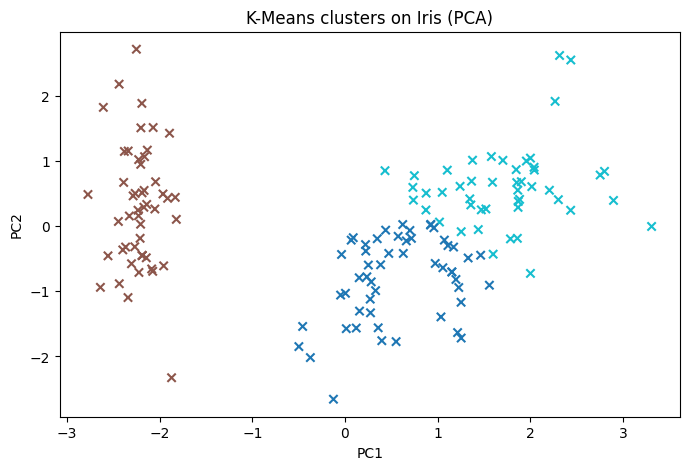

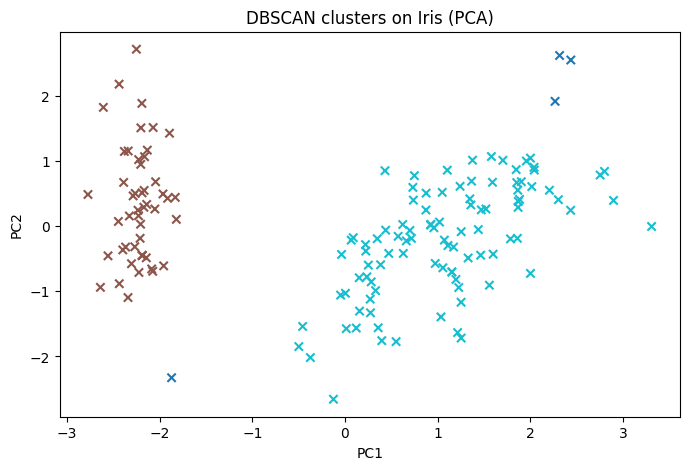

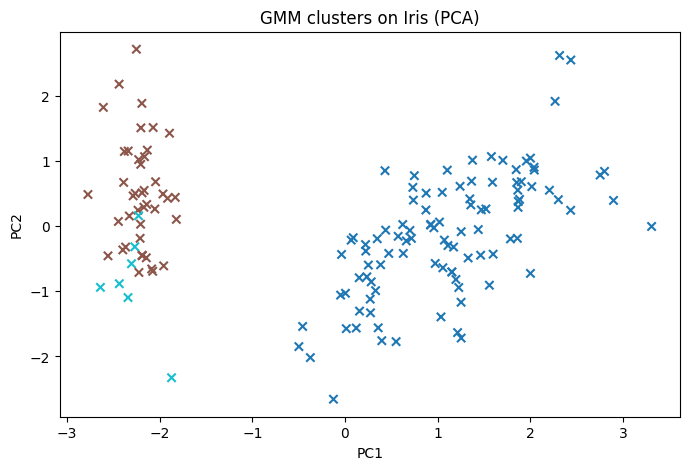

In [16]:
# 簡易畫圖函式
def cluster_scatter(X2d, labels, title):
    plt.figure()
    plt.scatter(X2d[:,0], X2d[:,1], c=labels, cmap='tab10', marker='x')
    plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(title)

cluster_scatter(X2, lab_km,  'K-Means clusters on Iris (PCA)')
cluster_scatter(X2, lab_db,  'DBSCAN clusters on Iris (PCA)')
cluster_scatter(X2, lab_gmm, 'GMM clusters on Iris (PCA)')
plt.show()

KMeans 給出最佳結果，有明顯區分成三群，沒有重疊，反觀，GMM有重疊、分布不均，DBSCAN分類不均，其中一類特別少。

### 2.3.c

1. 數值層面（ARI）
K-Means ARI = 0.620 為三者之冠，代表它分群後與真實品種標籤最一致。
DBSCAN ARI = 0.552：雖然能把 setosa 明顯分開，但對 versicolor/virginica 密度相近的樣本會誤判為雜訊或合併成同一群。
GMM ARI = 0.507：這裡的 GMM 可能因為沒有做標籤對齊（或參數設定不當）而導致分群編號錯配，使分群效果在指標上被嚴重低估。
結論：就 ARI 這個「和真實標籤比對」的準確度指標來看，K-Means 明顯優於其他兩種方法。

2. 視覺化層面（PCA 2D 投影）
當你將標準化後的 4 維 Iris 資料投影到前兩個主成分，並用不同顏色標示各方法的分群結果，可以觀察到：
K-Means
在 PCA 平面上，三個凸形叢集大致對應原始的三種類別輪廓。
Versicolor 與 Virginica 雖有少許重疊區域，但整體上 K-Means 的硬邊界切割，能較好地分隔這兩類。
DBSCAN
圖上可見部分屬於密度邊緣的點被標成「-1」（雜訊），造成第二、三群無法完整呈現。
對於 versicolor/virginica 的連續分布地帶，DBSCAN 容易將它們視為同一高密度區或噪聲，視覺上群形不完整。
GMM
若不做編號對齊，直接用 gmm.predict() 出來的標籤，其顏色分布在 PCA 平面上會與真實輪廓「錯位」：譬如 setosa 可能被標成藍色群，又或兩群顏色互換。
整體看起來 GMM 的三簇分配並未貼合原本的三種類別形狀。

結論：K-Means 在視覺上呈現的三個明顯、分割清晰的凸形叢集，最貼近真實的 setosa/versicolor/virginica 三類分布。